<a href="https://colab.research.google.com/github/stevecrawshaw/hackathon/blob/main/Copy_of_hackathon_eda_sc_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install relevant modules

In [ ]:
!pip install --upgrade geopandas pyshp shapely descartes

In [ ]:
!pip install --upgrade pandas_profiling


In [ ]:
!pip install --upgrade geoplot

In [196]:
!pip install google-colab-shell # this gives us a bash shell for processing images later



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for google-colab-shell: filename=google_colab_shell-0.2-py3-none-any.whl size=4123 sha256=40f5c4a9a767a7e8dd284c2a9335dca3594e8bb633336f747f5a8d0e75f40097
  Stored in directory: /root/.cache/pip/wheels/18/28/39/256dc5595d46f8781c8a52a86e31754b28168b2aa15d5d68fd
Successfully built google-colab-shell
from: can't read /var/mail/google_colab_shell


## Imports

In [238]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gp
from pandas_profiling import ProfileReport # only works on UBUNTU!
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from google_colab_shell import getshell
%matplotlib inline

### Health Data
Looks like this is a DF of health establishments detailing the facilities available and some location data. It is difficult to relate this dataset with the COVID data as it is somewhat sparse, quite old and there is no obvious link to the covid data in terms of facilities or outcomes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
health_df_raw = pd.read_csv('health.csv', index_col = 'facility_name')

In [173]:
# health_df_raw

## We can explore the health facility data with EDA tool `Pandas Profiling`

In [199]:
health_profile = ProfileReport(health_df_raw, title = "Health Facility EDA Report") # some sort of pandas incompatability error (works on ubuntu)

In [201]:
# health_profile

### COVID cases: Dates, locations and patient details for COVID cases
The `province/state` column looks useful for joining onto geographic data sets.
It's not clear what `source` means. There's a lot of missing data.

In [ ]:
covid_df_raw = pd.read_csv('https://raw.githubusercontent.com/dsfsi/covid19africa/master/data/line_lists/line-list-nigeria.csv',
                          index_col = ['case_id'])

In [172]:
covid_df_raw

,origin_case_id,date,age,gender,city,province/state,country,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,Unnamed: 19
case_id,,,,,,,,,,,,,,,,,,,
1,NaN,2/27/2020,44,Male,Ogun,Ogun,Nigeria,In recovery,www.bbc.com,NaN,NaN,2/27/2020,27-Feb-20,No,NaN,Italy,NaN,Patient came in from Italy.,NaN
2,NaN,03/09/2020,NaN,NaN,Ogun,Ogun,Nigeria,In treatment,https://twitter.com/NCDCgov/status/12376418124...,NaN,03/09/2020,03/09/2020,03/09/2020,No,NaN,NaN,NaN,NaN,NaN
3,NaN,3/16/2020,30,Female,Lagos,Lagos,Nigeria,Clinically Stable,https://twitter.com/NCDCgov/status/12398485450...,"Fever, Cold, Cough",NaN,3/17/2020,3/17/2020,NaN,13-Mar-20,United Kingdom,NaN,Patient returned from trip to UK and was in 14...,NaN
4,NaN,3/16/2020,58,Male,Lagos,Lagos,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,13-Mar-20,USA,NaN,Patient returned from travel to USA,NaN
5,NaN,3/16/2020,38,Female,NaN,Ekiti,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patient made contact with traveler from the USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397,NaN,05/19/2020,NaN,NaN,NaN,Bauchi,Nigeria,NaN,https://twitter.com/NCDCgov/status/12628754606...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,NaN,05/19/2020,NaN,NaN,NaN,Gombe,Nigeria,NaN,https://twitter.com/NCDCgov/status/12628754606...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,NaN,05/19/2020,NaN,NaN,NaN,Gombe,Nigeria,NaN,https://twitter.com/NCDCgov/status/12628754606...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
covid = covid_df_raw.copy()

covid['date'] = pd.to_datetime(covid_df_raw['date'])

In [ ]:
covid.set_index('date', inplace=True)

In [202]:
covid_profile = ProfileReport(covid, title = 'Covid Data Report')

In [204]:
# covid_profile

## If we focus on COVID-19 data we can chart the rise in cases over the early months of the pandemic

Text(0.5, 1.0, 'Cases by Date')

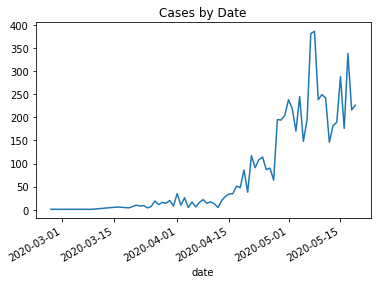

In [ ]:
ax = covid.groupby('date').count().country.plot();
ax.set_title('Cases by Date')

In [207]:


# read the CSV file
df = pd.read_csv("https://raw.githubusercontent.com/dsfsi/covid19africa/master/data/line_lists/line-list-nigeria.csv")

#making a cumulative date graph
dates = df[['case_id', 'date']]

# Convert the dates column to a datetime object
dates['date'] = pd.to_datetime(dates['date'])

# Group by date
day = dates.groupby('date').count()



<ipython-input-207-8228279221e1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['date'] = pd.to_datetime(dates['date'])


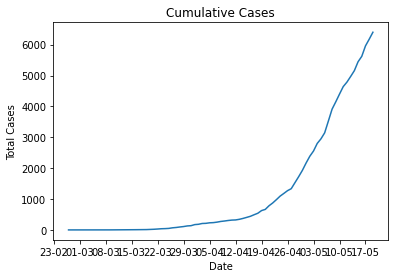

In [210]:
# Create a cumulative graph
cumulative_graph = plt.plot(day.cumsum(),)
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Cumulative Cases')
# Set the x-axis tick locations
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.show()

## Investigating the spatial spread of COVID -19 in Nigeria
We can plot a thematic map of total covid cases by joining the covid data to the boundary data in the geodatabase. Including total population gives us a per - capita COVID hospital admissions dataset which can be used to plot the map.

In [80]:
case_count_by_state = covid_df_raw.groupby("province/state").country.count()

In [118]:
df_case_count_by_state = pd.DataFrame(case_count_by_state)

In [119]:
df_case_count_by_state = df_case_count_by_state.reset_index()

df_case_count_by_state['province/state'] = df_case_count_by_state['province/state'].str.upper()  
df_case_count_by_state.rename(columns = {'province/state': 'State', 'country': 'case_count'}, inplace = True)

In [174]:
# df_case_count_by_state

### Population data
We only used Admin level 1 data as level 0 was for the whole country and Level 2 was too granular


In [ ]:
# read data from files
# nga_adm0_2020_df_raw = pd.read_csv('https://data.humdata.org/dataset/a7c3de5e-ff27-4746-99cd-05f2ad9b1066/resource/4710c51c-813b-481f-bb4e-ffb593e6f126/download/nga_admpop_adm0_2020.csv')
nga_adm1_2020_df_raw = pd.read_csv('https://data.humdata.org/dataset/a7c3de5e-ff27-4746-99cd-05f2ad9b1066/resource/d9fc551a-b5e4-4bed-9d0d-b047b6961817/download/nga_admpop_adm1_2020.csv')
# nga_adm2_2020_df_raw = pd.read_csv('https://data.humdata.org/dataset/a7c3de5e-ff27-4746-99cd-05f2ad9b1066/resource/562e7757-0683-4d61-87bd-a7c94af2ee38/download/nga_admpop_adm2_2020.csv')


#### WHOLE COUNTRY


In [175]:
# nga_adm0_2020_df_raw #NOT USED

#### ADMIN LEVEL 1

In [ ]:
nga_adm1_2020_df_raw.ADM1_NAME.unique()

array(['ABIA', 'ADAMAWA', 'AKWA IBOM', 'ANAMBRA', 'BAUCHI', 'BAYELSA',
       'BENUE', 'BORNO', 'CROSS RIVER', 'DELTA', 'EBONYI', 'EDO', 'EKITI',
       'ENUGU', 'FEDERAL CAPITAL TERRITORY', 'GOMBE', 'IMO', 'JIGAWA',
       'KADUNA', 'KANO', 'KATSINA', 'KEBBI', 'KOGI', 'KWARA', 'LAGOS',
       'NASARAWA', 'NIGER', 'OGUN', 'ONDO', 'OSUN', 'OYO', 'PLATEAU',
       'RIVERS', 'SOKOTO', 'TARABA', 'YOBE', 'ZAMFARA'], dtype=object)

In [ ]:

# Nigeria administrative level 1 (state) 2016 projected population statistics
nga_adm1_2020_df_raw.head()

,ADM0_NAME,ADM0_PCODE,ADM1_NAME,ADM1_PCODE,F_TL,M_TL,T_TL,F_00_04,F_05_09,F_10_14,...,T_35_39,T_40_44,T_45_49,T_50_54,T_55_59,T_60_64,T_65_69,T_70_74,T_75_79,T_80Plus
0,NIGERIA,NG,ABIA,NG001,1937239,1941738,3878977,210483,215867,248705,...,222947,194133,175852,134694,126513,84071,78976,48921,35513,19470
1,NIGERIA,NG,ADAMAWA,NG002,2168252,2228347,4396599,372760,320576,273011,...,225579,188995,143381,116482,94120,72897,58057,46415,27654,17161
2,NIGERIA,NG,AKWA IBOM,NG003,2789212,2876552,5665764,326260,342223,353787,...,340402,288166,256081,190410,160830,125151,98786,53539,32155,15171
3,NIGERIA,NG,ANAMBRA,NG004,2932876,3003908,5936784,319470,334304,379733,...,350214,302323,270660,201279,185087,122166,110187,64398,48022,23577
4,NIGERIA,NG,BAUCHI,NG005,3272516,3417618,6690134,639299,509011,402259,...,322124,276823,193548,172873,109191,101830,60952,58276,31020,23856


In [ ]:
#cleaning and renaming
nga_adm1_2020_df_raw.rename(columns={'ADM0_NAME':'Country', 'ADM1_NAME':'State', 'T_TL':'Total_Population'}, inplace=True)

In [83]:
state_pop_total = nga_adm1_2020_df_raw[['State', 'Total_Population']]

state_pop_total.head()

,State,Total_Population
0,ABIA,3878977
1,ADAMAWA,4396599
2,AKWA IBOM,5665764
3,ANAMBRA,5936784
4,BAUCHI,6690134


In [148]:
state_pop_total['State'] = state_pop_total['State'].replace(['FEDERAL CAPITAL TERRITORY'], ['ABUJA'])

<ipython-input-148-f94c8359eea2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_pop_total['State'] = state_pop_total['State'].replace(['FEDERAL CAPITAL TERRITORY'], ['ABUJA'])


#### ADMIN LEVEL 2

In [176]:
# Nigeria administrative level 2 (local government area) 2016 projected population statistics
# nga_adm2_2020_df_raw.head(3)

In [ ]:
# remove extraneous columns
unnamed = nga_adm2_2020_df_raw.filter(regex='Unnamed').columns
admcols = nga_adm2_2020_df_raw.filter(regex='ADM').columns
nga_adm2_2020 = nga_adm2_2020_df_raw.drop(columns = unnamed)

In [ ]:
# melt to make long
nga_adm2_2020_long = pd.melt(nga_adm2_2020,
        var_name = 'sex_age_cat',
        value_name = 'population',
        id_vars = admcols) 

In [177]:
# nga_adm2_2020_long

### Boundary geodata from Geo database

Geo data for Nigeria from ESRI Geo database  
Read the GDB into a geopandas df   
Looks like polygon boundaries for admin layers

In [ ]:
# Read data
country_geodata = gpd.read_file('nga_admbnda_osgof_eha_itos.gdb', layer = 0) # country
admin_1_geodata = gpd.read_file('nga_admbnda_osgof_eha_itos.gdb', layer = 1) # ADM1
admin_2_geodata = gpd.read_file('nga_admbnda_osgof_eha_itos.gdb', layer = 2) # ADM2


In [178]:
# country_geodata.head()

In [ ]:

admin_1_geodata.head(2)

,admin1Name_en,admin1Pcode,admin1RefName,admin1AltName1_en,admin1AltName2_en,admin0Name_en,admin0Pcode,date,validOn,validTo,Shape_Length,Shape_Area,geometry
0,Abia,NG001,Abia,None,None,Nigeria,NG,2016-11-29 00:00:00+00:00,2016-12-15 00:00:00+00:00,NaT,4.695135,0.396543,"MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036..."
1,Adamawa,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29 00:00:00+00:00,2016-12-15 00:00:00+00:00,NaT,11.525443,3.113007,"MULTIPOLYGON (((13.62129 10.94823, 13.62592 10..."


In [179]:
# admin_2_geodata.head(2)


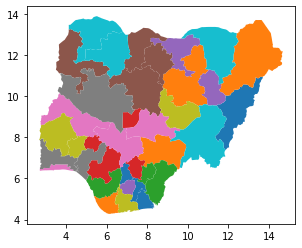

In [ ]:
admin_1_geodata.plot(column = 'admin1Pcode', legend = False);

In [180]:
# admin_2_geodata.plot(column = 'admin2Pcode');

In [110]:
# creating copies of the datasets to work with
cases = df_case_count_by_state.copy()
boundary = admin_1_geodata.copy()

In [ ]:
# subsets ambers columns
# cases = cases[[
#     "province/state",
#     "case_id"]] # check count data column name is correct

In [111]:
# renaming the "city" column in the cases dataset to merge
boundary = boundary.rename({
    "admin1Name_en" : "State"}, 
    axis = 'columns')

In [181]:
# get all the states in the right format for joining
boundary['State'] = boundary['State'].str.upper()
# Abuja = Federal capital; territory - this is populous
boundary['State'] = boundary['State'].replace(['FEDERAL CAPITAL TERRITORY'], ['ABUJA'])

# boundary

In [182]:
df_case_count_by_state.head()

,State,case_count
0,ABIA,5
1,ABUJA,427
2,ADAMAWA,26
3,AKWA IBOM,18
4,ANAMBRA,5


In [141]:

# merging datasets a left join to allow all boundary data to be populated with any case counts data
cases_count_by_area = pd.merge(
    boundary, 
    df_case_count_by_state,
    how='left', 
    on='State')
cases_count_by_area.shape


(37, 14)

In [142]:
# subsets columns
cases_count_by_area = cases_count_by_area[[
    "State",
    "geometry",
    "case_count"]] # Check count data column name is correct

 cases_count_by_area.head()

,State,geometry,case_count
0,ABIA,"MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036...",5.0
1,ADAMAWA,"MULTIPOLYGON (((13.62129 10.94823, 13.62592 10...",26.0
2,AKWA IBOM,"MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609...",18.0
3,ANAMBRA,"MULTIPOLYGON (((6.93254 6.71090, 6.93167 6.698...",5.0
4,BAUCHI,"MULTIPOLYGON (((10.75125 12.46148, 10.75615 12...",224.0


In [152]:
all_joined = pd.merge(cases_count_by_area,
                      state_pop_total,
                      how = 'left',
                      on = 'State')



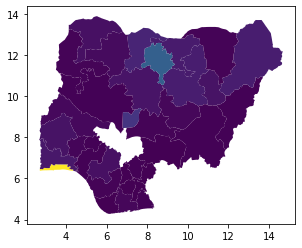

In [154]:
all_joined.plot('case_count');

In [186]:
all_joined['hosp_cases_per_100k'] = (all_joined['case_count']  / all_joined['Total_Population']) * 1000000
# all_joined = all_joined.fillna(0)

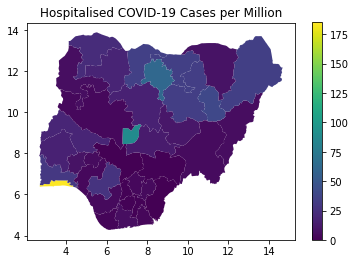

In [187]:
ax = all_joined.plot('hosp_cases_per_100k', legend = True);
ax.set_title('Hospitalised COVID-19 Cases per Million');

## An animated map may show the spread of COVID in early 2020
Though our data is sparse. There are low rates of admissions when considering the total population. This may be related to poverty, geography and costs of healthcare.

## [Animated Maps with Pandas](https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8)

In [211]:
covid = covid.reset_index()
covid['week_commencing'] = covid['date'].map(lambda x: x.to_period("W").start_time)


In [213]:
df_weekly_case_count_by_state = covid.groupby(['week_commencing', 'province/state'])['country'].count()

df_weekly_case_count_by_state = pd.DataFrame(df_weekly_case_count_by_state)

df_weekly_case_count_by_state.head()



country
week_commencing province/state         
2020-02-24      Ogun                  1
2020-03-09      Ogun                  1
2020-03-16      Abuja                 4
                Ekiti                 1
                Lagos                22

In [214]:
df_weekly_case_count_by_state_2 = df_weekly_case_count_by_state.reset_index()

df_weekly_case_count_by_state_2.rename(columns={'country':'case_count', 'province/state':'State'}, inplace=True)

df_weekly_case_count_by_state_2 = df_weekly_case_count_by_state_2.sort_values(by=['week_commencing'])

df_weekly_case_count_by_state_2['State'] = df_weekly_case_count_by_state_2['State'].str.upper()

df_weekly_case_count_by_state_2.head()

,week_commencing,State,case_count
0,2020-02-24,OGUN,1
1,2020-03-09,OGUN,1
2,2020-03-16,ABUJA,4
3,2020-03-16,EKITI,1
4,2020-03-16,LAGOS,22


In [222]:
df_weekly_case_count_by_state_2['week_commencing'] = df_weekly_case_count_by_state_2['week_commencing'].astype('str')
pivot = df_weekly_case_count_by_state_2.pivot_table(index='State', columns='week_commencing', values=['case_count'])
pivot = pivot.fillna(0)
pivot.columns = pivot.columns.get_level_values(1)

pivot.head()

week_commencing,2020-02-24,2020-03-09,2020-03-16,2020-03-23,2020-03-30,2020-04-06,2020-04-13,2020-04-20,2020-04-27,2020-05-04,2020-05-11,2020-05-18
State,,,,,,,,,,,,
ABIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0
ABUJA,0.0,0.0,4.0,17.0,26.0,9.0,32.0,53.0,137.0,78.0,62.0,9.0
ADAMAWA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,11.0,4.0,5.0
AKWA IBOM,0.0,0.0,0.0,0.0,5.0,0.0,4.0,2.0,4.0,1.0,2.0,0.0
ANAMBRA,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0


In [223]:
boundary_to_join = boundary.set_index('State')

map_source_df = pd.merge(boundary_to_join,
                         pivot,
                         left_index=True,
                         right_index=True,
                         how = 'left')


In [236]:
map_source_df  = gpd.GeoDataFrame(map_source_df)


In [225]:
# save all the maps in the charts folder
output_path = 'charts/maps'

# counter for the for loop
i = 0

# list of weeks_year (which are the column names at the moment)
list_of_weeks = ['2020-02-24',
       '2020-03-09', '2020-03-16', '2020-03-23', '2020-03-30', '2020-04-06',
       '2020-04-13', '2020-04-20', '2020-04-27', '2020-05-04', '2020-05-11',
       '2020-05-18']

In [227]:
# set the min and max range for the choropleth map
vmin, vmax = 0, 800

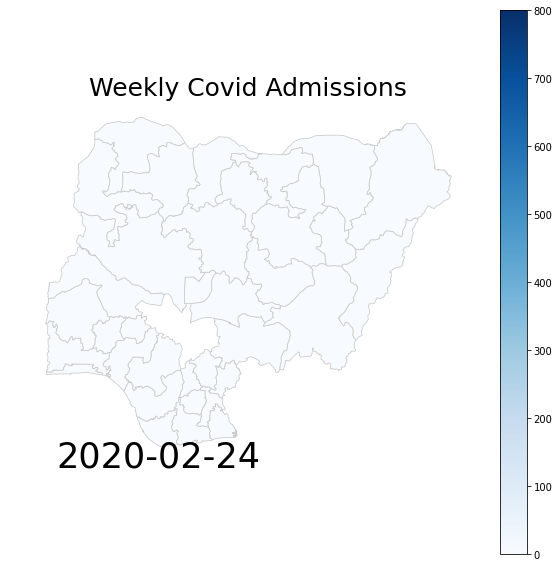

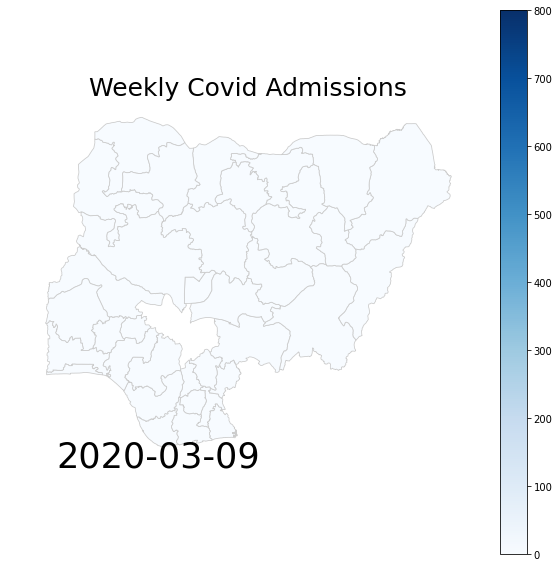

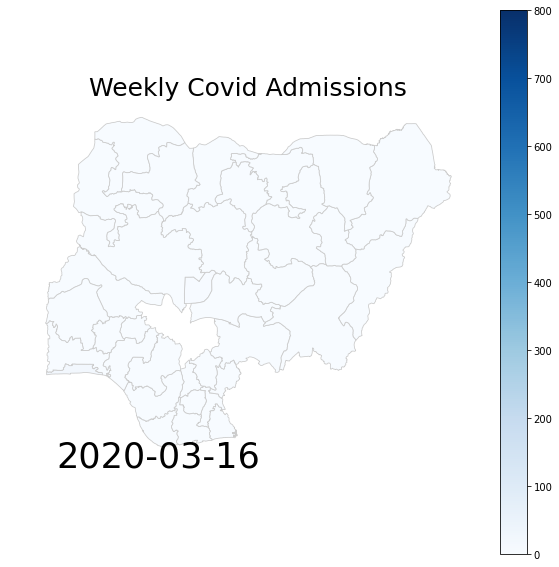

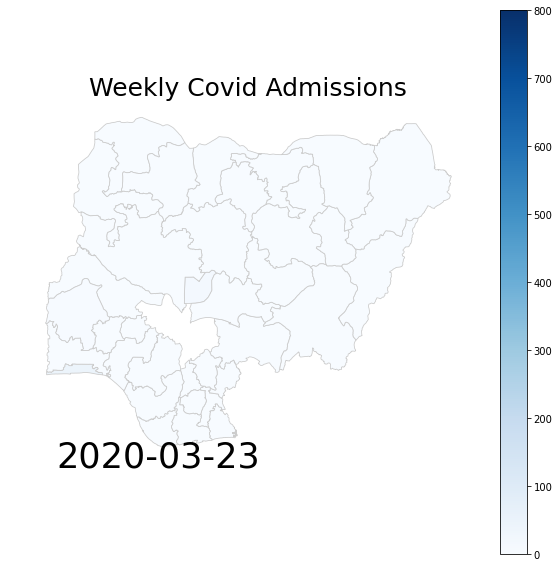

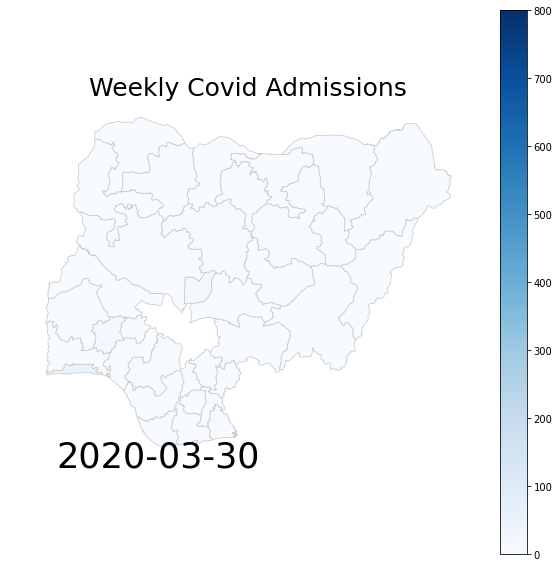

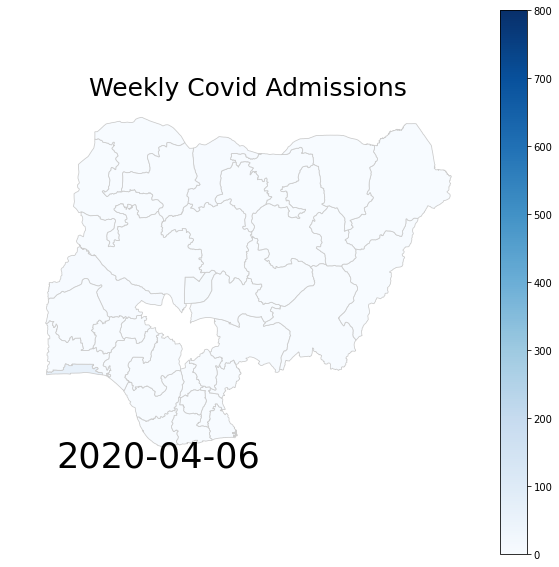

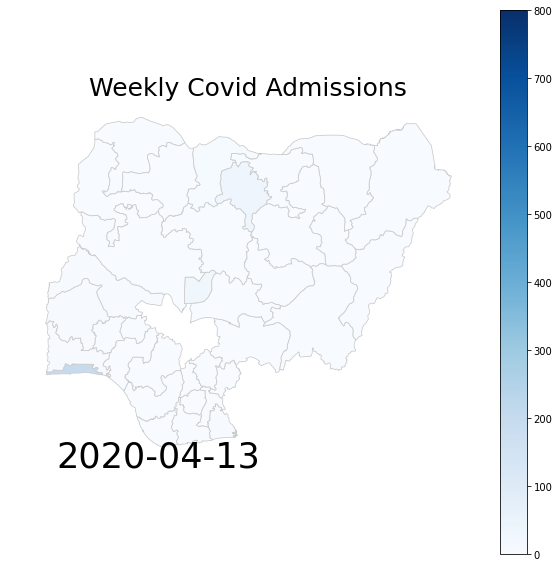

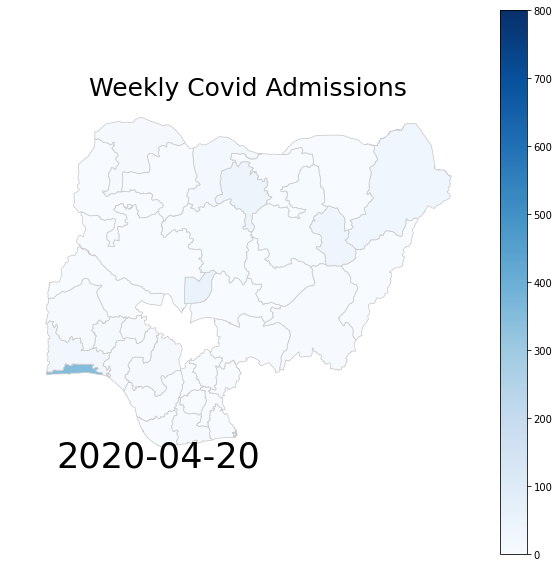

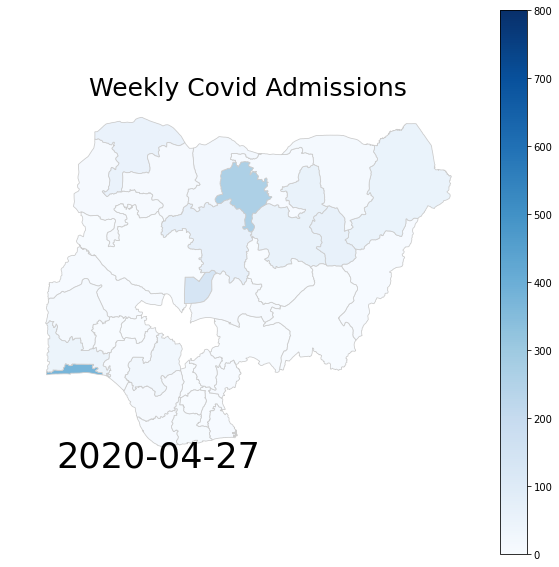

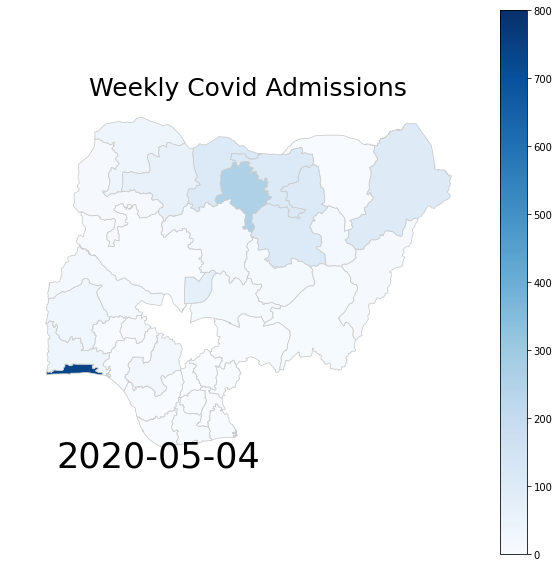

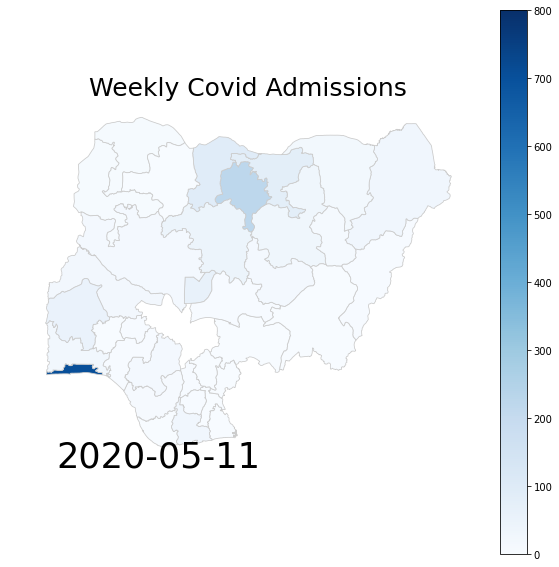

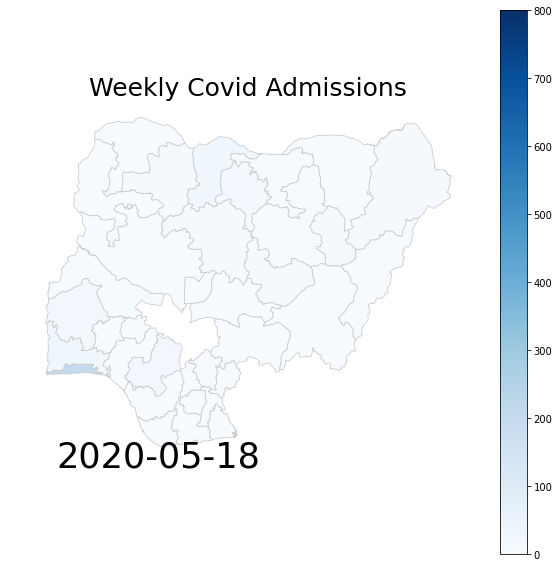

In [239]:
# start the for loop to create one map per week
for week in list_of_weeks:

    # our dataframe needs to be a geopandas df with the relevant columns being weekly total cases by state
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
  fig = map_source_df.plot(column=week, cmap='Blues', figsize=(10,10),linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, legend=True, norm=plt.Normalize(vmin=vmin,vmax=vmax))
    
    # remove axis of chart
  fig.axis('off')
    
    # add a title
  fig.set_title('Weekly Covid Admissions', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # create an annotation for the year by grabbing the first 4 digits
    # only_week = week[:4]
    # position the annotation to the bottom left
  fig.annotate(week,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
  filepath = os.path.join(output_path, week +'_covid_nigeria.png')
  chart = fig.get_figure()
  chart.savefig(filepath, dpi=300)

In [198]:
getshell(height=400)


In [ ]:

# Paste this text into the shell to make the jpg's
cd charts/maps/
!for i in *.png; do sips -s format jpeg -s formatOptions 70 "${i}" --out "${i%png}jpg"; done